# Welcome to COCO DATA SET!!!

# The JARVIS team welcomes you to the tutorial on coco data set, we hope you have fun coding !!!

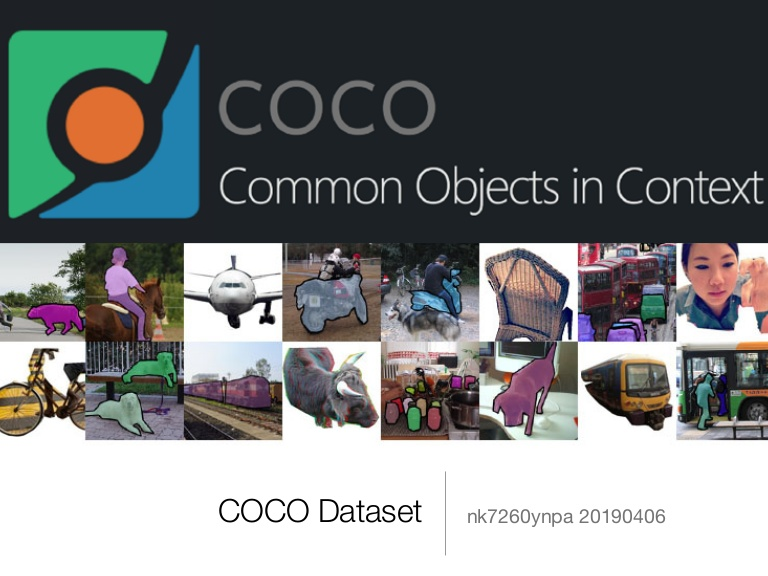

In [1]:
# List all files existing 
!ls

sample_data


# Step 1. Downloading TRAIN images from COCO data set

In [2]:
!wget http://images.cocodataset.org/zips/train2017.zip

--2021-06-11 23:25:40--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.21.51
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.21.51|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  57.8MB/s    in 5m 4s   

2021-06-11 23:30:44 (60.7 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



# Step 2. Downloading VALIDATION images from COCO data set

In [3]:
!wget http://images.cocodataset.org/zips/val2017.zip

--2021-06-11 23:30:52--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.1.4
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.1.4|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  71.8MB/s    in 10s     

2021-06-11 23:31:02 (77.6 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



# Step 3. Downloading required images from COCO data set

In [4]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2021-06-11 23:31:04--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.197.9
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.197.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M   100MB/s    in 2.4s    

2021-06-11 23:31:07 (100 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [5]:
!wget http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip

--2021-06-11 23:31:09--  http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.137.12
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.137.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148688564 (1.1G) [application/zip]
Saving to: ‘stuff_annotations_trainval2017.zip’

stuff_annotations_t 100%[===================>]   1.07G  16.4MB/s    in 55s     

2021-06-11 23:32:04 (19.9 MB/s) - ‘stuff_annotations_trainval2017.zip’ saved [1148688564/1148688564]



# Step 4. Unzip all files downloaded

In [6]:
%%capture
!unzip stuff_annotations_trainval2017.zip

In [7]:
%%capture
!unzip annotations_trainval2017.zip

In [8]:
%%capture
!unzip train2017.zip

In [9]:
%%capture
!unzip val2017.zip

In [10]:
!pip install gluoncv

     |████████████████████████████████| 1.3MB 25.0MB/s 


In [11]:
!pip install mxnet

     |████████████████████████████████| 46.9MB 85kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


At this point you should have all of this files loaded:


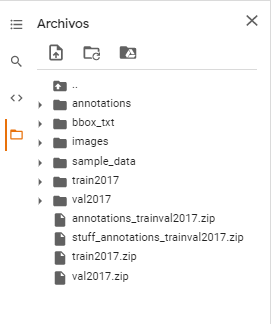

In [12]:
!ls

annotations		      stuff_annotations_trainval2017.zip  val2017
annotations_trainval2017.zip  train2017				  val2017.zip
sample_data		      train2017.zip


In [13]:
from gluoncv import data, utils
from matplotlib import pyplot as plt

train_dataset = data.COCODetection('.',splits=['instances_train2017'])
val_dataset = data.COCODetection('.',splits=['instances_val2017'])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.8.0` and `torch==1.8.1+cu101` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


loading annotations into memory...
Done (t=27.44s)
creating index...
index created!
loading annotations into memory...
Done (t=0.82s)
creating index...
index created!
Num of training images: 117266
Num of validation images: 4952


In [14]:
#print the number of images in train dataset 
print(len(train_dataset))

117266


(4, 5)
Image size (height, width, RGB): (364, 640, 3)
Num of objects: 4
Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):
 [[349.34 171.11 387.03 278.28]
 [282.99 168.63 316.74 273.68]
 [310.08 265.77 387.13 278.47]
 [428.57 266.25 458.05 284.22]]
Class IDs (num_boxes, ):
 [[ 0.]
 [ 0.]
 [30.]
 [30.]]


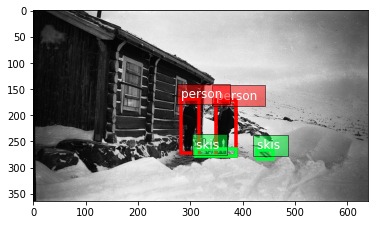

In [25]:
train_image, train_label = train_dataset[35562]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print(train_label.shape)
print('Image size (height, width, RGB):', train_image.shape)
print('Num of objects:', bounding_boxes.shape[0])
print('Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):\n',
      bounding_boxes)
print('Class IDs (num_boxes, ):\n', class_ids)

utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    labels=class_ids, class_names=train_dataset.classes)
plt.show()

In [ ]:
print(len(train_dataset))

117266


In [16]:
#OpenCV demo

def imShowCv(image):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  
  
  

(12, 5)
[[4.9673e+02 6.7000e+01 6.3847e+02 2.1400e+02]
 [4.2791e+02 2.9370e+01 5.2537e+02 1.0139e+02]
 [5.6198e+02 3.4720e+01 6.3878e+02 6.8360e+01]
 [2.9000e-01 2.7670e+01 4.3890e+01 9.4970e+01]
 [5.0049e+02 1.6648e+02 5.8233e+02 4.9799e+02]
 [1.2714e+02 2.4000e+00 4.3426e+02 4.5728e+02]
 [5.2430e+02 3.2280e+01 5.5902e+02 7.1380e+01]
 [3.4360e+01 2.4000e+00 3.0368e+02 3.9657e+02]
 [4.0500e+02 8.1690e+01 5.7083e+02 4.0170e+02]
 [4.3065e+02 7.1300e+01 4.5494e+02 1.1128e+02]
 [8.5000e-01 1.9320e+01 5.8880e+01 3.4647e+02]
 [4.2845e+02 0.0000e+00 5.5094e+02 2.7170e+01]]
[[ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [28.]
 [ 2.]
 [58.]
 [ 2.]]
<class 'numpy.ndarray'>


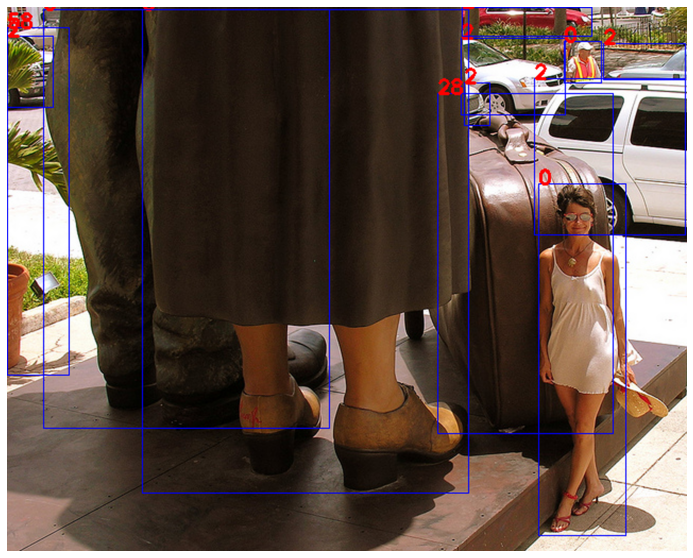

In [27]:
import cv2
import numpy as np


train_image, train_label = train_dataset[84552]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print(train_label.shape)



print(bounding_boxes)
print(class_ids)

train_image = train_image.asnumpy()
print(type(train_image))
train_image = cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB)


for i in range(len(class_ids)):
  
  class_id = str(int(class_ids[i][0]))
  bbox = bounding_boxes[i]
  
  x1 = int(bbox[0])
  y1 = int(bbox[1])
  x2 = int(bbox[2])
  y2 = int(bbox[3])
  
  
  cv2.rectangle(train_image, (x1, y1), (x2, y2), (255, 0, 0), 1)
  cv2.putText(train_image,class_id, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, .6,(0, 0, 255),2)
  
  




imShowCv(train_image)


In [18]:
def yolo_format(class_index, point_1, point_2, width, height):
    # YOLO wants everything normalized
    # Order: class x_center y_center x_width y_height
    x_center = (point_1[0] + point_2[0]) / float(2.0 * width)
    y_center = (point_1[1] + point_2[1]) / float(2.0 * height)
    x_width = float(abs(point_2[0] - point_1[0])) / width
    y_height = float(abs(point_2[1] - point_1[1])) / height
    return str(class_index) + " " + str(x_center) \
       + " " + str(y_center) + " " + str(x_width) + " " + str(y_height)
  
def save_bb(txt_path, line):
    with open(txt_path, 'a') as myfile:
        myfile.write(line + "\n") # append line

In [19]:
!ls

annotations		      stuff_annotations_trainval2017.zip  val2017
annotations_trainval2017.zip  train2017				  val2017.zip
sample_data		      train2017.zip


In [20]:
!mkdir bbox_txt
!mkdir images

In [21]:
import cv2
import os

n=0
imgFolder = 'images'
txtFolder = 'bbox_txt'

#id of your class in training of the YOLOv3 model
label_class_id = 0



for i in range(len(train_dataset)):
  
  if i % 500 == 0:
    print(i)
    print('images of interest',n)
  
  train_image, train_label = train_dataset[i]
  bounding_boxes = train_label[:, :4]
  class_ids = train_label[:, 4:5]
  
  
  
  if 0 in class_ids:
    
    name = 'person_'+str(n)
    txtPath = os.path.join(txtFolder, name)+'.txt'
    imgPath = os.path.join(imgFolder, name) +'.jpg'
    #print(txtPath, imgPath)
    
    
    
    
    #utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    #labels=class_ids, class_names=train_dataset.classes)
    
    
    image = train_image.asnumpy()
    height, width = image.shape[:2]
    
    #print(bounding_boxes)
    #print(class_ids)
    
    
    for j in range(len(class_ids)):
      
      if class_ids[j]==51:
        
        
        x1 = int(bounding_boxes[j][0])
        y1 = int(bounding_boxes[j][1])
        x2 = int(bounding_boxes[j][2])
        y2 = int(bounding_boxes[j][3])
        
        
        
        line = yolo_format(label_class_id,(x1,y1),(x2,y2),width, height)
        save_bb(txtPath, line)
        
        
    n+=1
    
        
        #cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255,0,0), 2)
    
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.imwrite(imgPath,image)
    
    #plt.show()
      
print(n)

0
images of interest 0
500
images of interest 259
1000
images of interest 547
1500
images of interest 825
2000
images of interest 1085
2500
images of interest 1353
3000
images of interest 1634
3500
images of interest 1913
4000
images of interest 2177
4500
images of interest 2443
5000
images of interest 2726
5500
images of interest 3008
6000
images of interest 3279
6500
images of interest 3557
7000
images of interest 3843
7500
images of interest 4108
8000
images of interest 4392
8500
images of interest 4678
9000
images of interest 4945
9500
images of interest 5196
10000
images of interest 5491
10500
images of interest 5777
11000
images of interest 6078
11500
images of interest 6367
12000
images of interest 6632
12500
images of interest 6903
13000
images of interest 7193
13500
images of interest 7464
14000
images of interest 7713
14500
images of interest 7981
15000
images of interest 8268
15500
images of interest 8546
16000
images of interest 8809
16500
images of interest 9066
17000
imag

In [22]:
!zip -r label.zip bbox_txt images

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  adding: images/person_2780.jpg (deflated 0%)
  adding: images/person_47265.jpg (deflated 0%)
  adding: images/person_18695.jpg (deflated 3%)
  adding: images/person_2925.jpg (deflated 0%)
  adding: images/person_48163.jpg (deflated 3%)
  adding: images/person_59658.jpg (deflated 4%)
  adding: images/person_39272.jpg (deflated 0%)
  adding: images/person_27734.jpg (deflated 0%)
  adding: images/person_26970.jpg (deflated 5%)
  adding: images/person_7631.jpg (deflated 0%)
  adding: images/person_8721.jpg (deflated 0%)
  adding: images/person_40958.jpg (deflated 0%)
  adding: images/person_51354.jpg (deflated 0%)
  adding: images/person_30310.jpg (deflated 0%)
  adding: images/person_28328.jpg (deflated 3%)
  adding: images/person_56949.jpg (deflated 0%)
  adding: images/person_34147.jpg (deflated 0%)
  adding: images/person_53858.jpg (deflated 0%)
  adding: images/person_19788.jpg (deflated 3%)
  adding: images/person_3

Connect your GOOGLE DRIVE to upload all the images 

In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [24]:
print(len(os.listdir('images')))
print(len(os.listdir('bbox_txt')))

64115
366
